# Data Cleaning Document - School Enrollment
Author: Geri Harding

School Enrollment Data acquired from the Census, using 2018. 

In [1]:
#Packages import
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64

In [2]:
#Open saved csv from downloaded census data
file = open("pop_data.csv","r")
df = pd.read_csv("pop_data.csv")
pd.set_option('display.max_columns', None)

In [3]:
#preview data 
df.head()

,GEO_ID,NAME,P1_001N,P1_002N,P1_003N,P1_004N,P1_005N,P1_006N,P1_007N,P1_008N,P1_009N,P1_010N,P1_011N,P1_012N,P1_013N,P1_014N,P1_015N,P1_016N,P1_017N,P1_018N,P1_019N,P1_020N,P1_021N,P1_022N,P1_023N,P1_024N,P1_025N,P1_026N,P1_027N,P1_028N,P1_029N,P1_030N,P1_031N,P1_032N,P1_033N,P1_034N,P1_035N,P1_036N,P1_037N,P1_038N,P1_039N,P1_040N,P1_041N,P1_042N,P1_043N,P1_044N,P1_045N,P1_046N,P1_047N,P1_048N,P1_049N,P1_050N,P1_051N,P1_052N,P1_053N,P1_054N,P1_055N,P1_056N,P1_057N,P1_058N,P1_059N,P1_060N,P1_061N,P1_062N,P1_063N,P1_064N,P1_065N,P1_066N,P1_067N,P1_068N,P1_069N,P1_070N,P1_071N
0,id,Geographic Area Name,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or A...,!!Total:!!Population of one race:!!American I...,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Haw...,!!Total:!!Population of one race:!!Some Other...,!!Total:!!Population of two or more races:,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two 

In [4]:
df.columns

Index(['GEO_ID', 'NAME', 'P1_001N', 'P1_002N', 'P1_003N', 'P1_004N', 'P1_005N',
       'P1_006N', 'P1_007N', 'P1_008N', 'P1_009N', 'P1_010N', 'P1_011N',
       'P1_012N', 'P1_013N', 'P1_014N', 'P1_015N', 'P1_016N', 'P1_017N',
       'P1_018N', 'P1_019N', 'P1_020N', 'P1_021N', 'P1_022N', 'P1_023N',
       'P1_024N', 'P1_025N', 'P1_026N', 'P1_027N', 'P1_028N', 'P1_029N',
       'P1_030N', 'P1_031N', 'P1_032N', 'P1_033N', 'P1_034N', 'P1_035N',
       'P1_036N', 'P1_037N', 'P1_038N', 'P1_039N', 'P1_040N', 'P1_041N',
       'P1_042N', 'P1_043N', 'P1_044N', 'P1_045N', 'P1_046N', 'P1_047N',
       'P1_048N', 'P1_049N', 'P1_050N', 'P1_051N', 'P1_052N', 'P1_053N',
       'P1_054N', 'P1_055N', 'P1_056N', 'P1_057N', 'P1_058N', 'P1_059N',
       'P1_060N', 'P1_061N', 'P1_062N', 'P1_063N', 'P1_064N', 'P1_065N',
       'P1_066N', 'P1_067N', 'P1_068N', 'P1_069N', 'P1_070N', 'P1_071N'],
      dtype='object')

In [5]:
#Get data summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 73 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   GEO_ID   3222 non-null   object
 1   NAME     3222 non-null   object
 2   P1_001N  3222 non-null   object
 3   P1_002N  3222 non-null   object
 4   P1_003N  3222 non-null   object
 5   P1_004N  3222 non-null   object
 6   P1_005N  3222 non-null   object
 7   P1_006N  3222 non-null   object
 8   P1_007N  3222 non-null   object
 9   P1_008N  3222 non-null   object
 10  P1_009N  3222 non-null   object
 11  P1_010N  3222 non-null   object
 12  P1_011N  3222 non-null   object
 13  P1_012N  3222 non-null   object
 14  P1_013N  3222 non-null   object
 15  P1_014N  3222 non-null   object
 16  P1_015N  3222 non-null   object
 17  P1_016N  3222 non-null   object
 18  P1_017N  3222 non-null   object
 19  P1_018N  3222 non-null   object
 20  P1_019N  3222 non-null   object
 21  P1_020N  3222 non-null   object
 22  

## Cleaning Pop Data
In order to get the School Enrollment Data to a usuable form, I will replace the header row, split the Geographic Area Name, rename columns, and create a new dataframe with the columns of relevant data only. 

In [6]:
#Remove header row to get row 1 as headers 
df.columns = df.iloc[0]
data = df.drop(labels=0, axis=0)
data

,id,Geographic Area Name,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or African American alone,!!Total:!!Population of one race:!!American Indian and Alaska Native alone,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone,!!Total:!!Population of one race:!!Some Other Race alone,!!Total:!!Population of two or more races:,!!Total:!!Population of two or more races:!!Population of two races:,!!Total:!!Population of two or more races:!!Population of two races:!!White; Black or African American,!!Total:!!Population of two or more races:!!Population of two races:!!White; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of two races:!!White; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!White; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!White; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Asian; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!Asian; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; Asian; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; Asian; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!Black or African American; American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more

In [7]:
data.columns

Index(['id', 'Geographic Area Name', ' !!Total:',
       ' !!Total:!!Population of one race:',
       ' !!Total:!!Population of one race:!!White alone',
       ' !!Total:!!Population of one race:!!Black or African American alone',
       ' !!Total:!!Population of one race:!!American Indian and Alaska Native alone',
       ' !!Total:!!Population of one race:!!Asian alone',
       ' !!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone',
       ' !!Total:!!Population of one race:!!Some Other Race alone',
       ' !!Total:!!Population of two or more races:',
       ' !!Total:!!Population of two or more races:!!Population of two races:',
       ' !!Total:!!Population of two or more races:!!Population of two races:!!White; Black or African American',
       ' !!Total:!!Population of two or more races:!!Population of two races:!!White; American Indian and Alaska Native',
       ' !!Total:!!Population of two or more races:!!Population of two races:!!White; Asian'

In [8]:
#Dropping all irrelevant columns by creating a new dataframe with usable data
clean_data = data[["id", "Geographic Area Name"," !!Total:"]]

clean_data = clean_data.rename(columns = {" !!Total:":"pop_total"})

clean_data

,id,Geographic Area Name,pop_total
1,0500000US01001,"Autauga County, Alabama",58805
2,0500000US01003,"Baldwin County, Alabama",231767
3,0500000US01005,"Barbour County, Alabama",25223
4,0500000US01007,"Bibb County, Alabama",22293
5,0500000US01009,"Blount County, Alabama",59134
...,...,...,...
3217,0500000US72145,"Vega Baja Municipio, Puerto Rico",54414
3218,0500000US72147,"Vieques Municipio, Puerto Rico",8249
3219,0500000US72149,"Villalba Municipio, Puerto Rico",22093
3220,0500000US72151,"Yabucoa Municipio, Puerto Rico",30426


In [9]:
#Split county and state name columns to be compatible with other data
#clean_data = clean_data["Geographic Area Name"](clean_data.iterrows.str.split(",").tolist(), columns = ["County", "State"])
clean_data[["county", "state"]] = clean_data["Geographic Area Name"].str.split(',', expand=True)
clean_data = clean_data.drop("Geographic Area Name", 1)
clean_data

,id,pop_total,county,state
1,0500000US01001,58805,Autauga County,Alabama
2,0500000US01003,231767,Baldwin County,Alabama
3,0500000US01005,25223,Barbour County,Alabama
4,0500000US01007,22293,Bibb County,Alabama
5,0500000US01009,59134,Blount County,Alabama
...,...,...,...,...
3217,0500000US72145,54414,Vega Baja Municipio,Puerto Rico
3218,0500000US72147,8249,Vieques Municipio,Puerto Rico
3219,0500000US72149,22093,Villalba Municipio,Puerto Rico
3220,0500000US72151,30426,Yabucoa Municipio,Puerto Rico


In [11]:
clean_data.describe()

,id,pop_total,county,state
count,3221,3221,3221,3221
unique,3221,3161,1956,52
top,0500000US01065,34668,Washington County,Texas
freq,1,3,30,254


In [12]:
clean_data["pop_total"] = clean_data["pop_total"].astype(int)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3221 entries, 1 to 3221
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3221 non-null   object
 1   pop_total  3221 non-null   int64 
 2   county     3221 non-null   object
 3   state      3221 non-null   object
dtypes: int64(1), object(3)
memory usage: 125.8+ KB


In [13]:
clean_data.sort_values(["pop_total"], ascending=False)

,id,pop_total,county,state
206,0500000US06037,10014009,Los Angeles County,California
612,0500000US17031,5275541,Cook County,Illinois
2625,0500000US48201,4731145,Harris County,Texas
105,0500000US04013,4420568,Maricopa County,Arizona
224,0500000US06073,3298634,San Diego County,California
...,...,...,...,...
1714,0500000US31117,399,McPherson County,Nebraska
2655,0500000US48261,350,Kenedy County,Texas
2659,0500000US48269,265,King County,Texas
550,0500000US15005,82,Kalawao County,Hawaii


<AxesSubplot:ylabel='Frequency'>

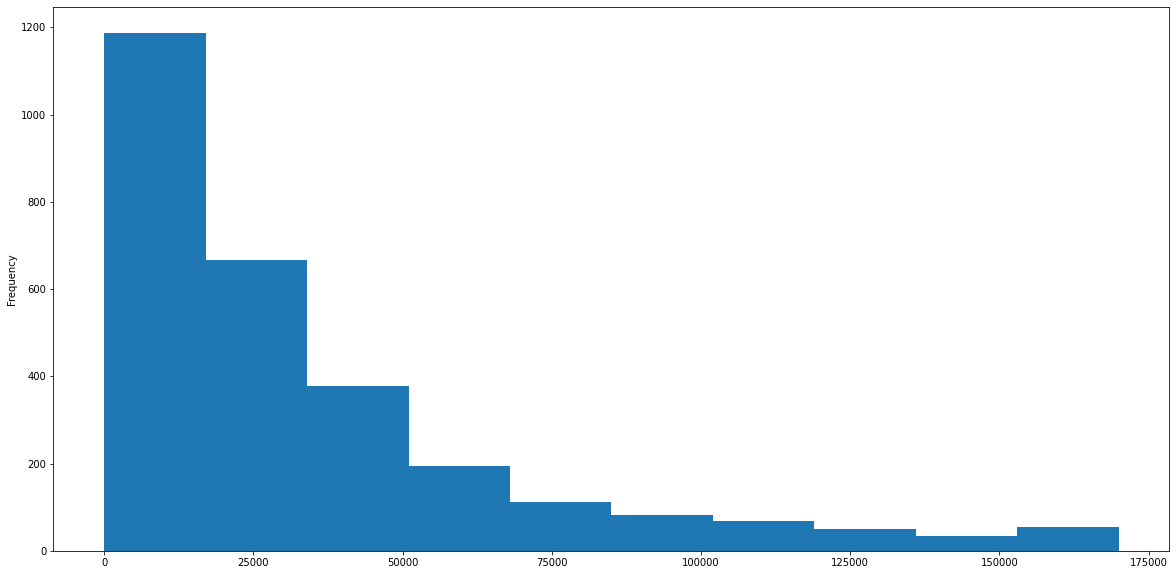

In [16]:
clean_data["pop_total"].plot.hist(range=[0.0, 170000], figsize = (20,10))

In [49]:
#creating urban vs rural population classification
def pop_type(pop_total):
    """Assign labels to county according to their population size
    """
    if pop_total < 10000:
        label = "Rural"
    elif pop_total < 49999: #Between 10,000 to 49,999
        label = "Micro Area"
    else: #Greater than 50k
        label = "Metro Area"
    return label

In [50]:
clean_data["pop_class"] = clean_data["pop_total"].apply(pop_type)

In [52]:
clean_data

,id,pop_total,county,state,pop_class
1,0500000US01001,58805,Autauga County,Alabama,Metro Area
2,0500000US01003,231767,Baldwin County,Alabama,Metro Area
3,0500000US01005,25223,Barbour County,Alabama,Micro Area
4,0500000US01007,22293,Bibb County,Alabama,Micro Area
5,0500000US01009,59134,Blount County,Alabama,Metro Area
...,...,...,...,...,...
3217,0500000US72145,54414,Vega Baja Municipio,Puerto Rico,Metro Area
3218,0500000US72147,8249,Vieques Municipio,Puerto Rico,Rural
3219,0500000US72149,22093,Villalba Municipio,Puerto Rico,Micro Area
3220,0500000US72151,30426,Yabucoa Municipio,Puerto Rico,Micro Area


In [51]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3221 entries, 1 to 3221
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3221 non-null   object
 1   pop_total  3221 non-null   int64 
 2   county     3221 non-null   object
 3   state      3221 non-null   object
 4   pop_class  3221 non-null   object
dtypes: int64(1), object(4)
memory usage: 151.0+ KB


In [53]:
pop_data = clean_data.groupby(["pop_class"]).size()
pop_data

pop_class
Metro Area    1005
Micro Area    1479
Rural          737
dtype: int64

<AxesSubplot:xlabel='pop_class'>

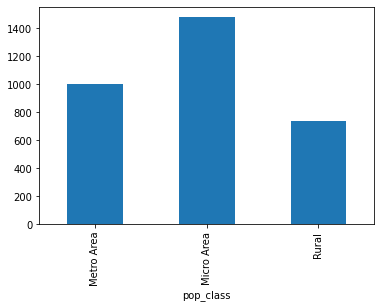

In [54]:
pop_data.plot.bar("pop_total")

In [57]:
#Save new data to CSV
pop_data.to_csv(r"pop_data_clean.csv", index = False)